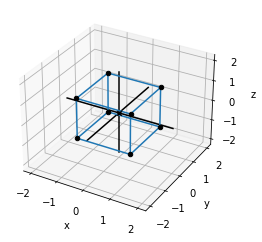

In [1]:
# Exercise 3.2 Mini Project
#
# There are exactly eight 3D vectors whose coordinates are all either +1 or –1.
# For instance, (1, –1, 1) is one of these. Plot all of these eight vectors as
# points. Then figure out how to connect them with line segments using Segment3D
# objects to form the outline of a cube.

from draw3d import *

vs = [1, -1]
points = [(x, y, z) for x in vs for y in vs for z in vs]

x_edges = [((-1, y, z), ((1, y, z))) for y in vs for z in vs]
y_edges = [((x, -1, z), ((x, 1, z))) for x in vs for z in vs]
z_edges = [((x, y, -1), ((x, y, 1))) for x in vs for y in vs]

edges = x_edges + y_edges + z_edges

draw3d(Points3D(*points), *[Segment3D(*edge) for edge in edges])


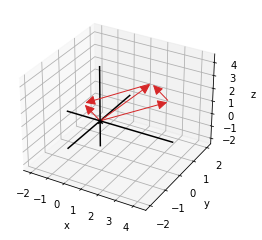

In [5]:
# Exercise 3.3
# 
# Draw (4, 0, 3) and (–1, 0, 1) as Arrow3D objects, such that they are placed
# tip-to-tail in both orders in 3D. What is their vector sum?

from draw3d import *

v1 = (4, 0, 3)
v2 = (-1, 0, 1)

def add(v1, v2):
    return tuple(map(sum, zip(v1, v2)))

s = add(v1, v2)

draw3d(
    Arrow3D(v1),
    Arrow3D(v2),
    Arrow3D(s, v1),
    Arrow3D(v2, s),
    Arrow3D(s)
)

In [9]:
# Exercise 3.4
#
# Suppose we set vectors1=[(1,2,3,4,5),(6,7,8,9,10)] and
# vectors2=[(1,2),(3,4),(5,6)]. Without evaluating in Python, what are the
# lengths of zip(*vectors1) and zip(*vectors2)?

vectors1 = [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
vectors2 = [(1, 2), (3, 4), (5, 6)]

assert(len(list(zip(*vectors1))), 5)
assert(len(list(zip(*vectors2))), 2)


<>:10: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:10: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/zk/vmw322415kx9wn4f2l26xjcw0000gn/T/ipykernel_79440/2945362193.py:10: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(list(zip(*vectors1))), 5)
/var/folders/zk/vmw322415kx9wn4f2l26xjcw0000gn/T/ipykernel_79440/2945362193.py:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(list(zip(*vectors2))), 2)


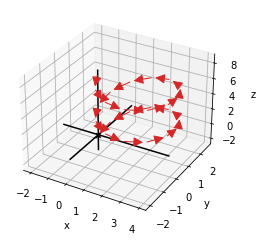

In [29]:
# Exercise 3.5 — Mini Project
#
# The following comprehension creates a list of 24
# Python vectors: vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]
# What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D
# objects.

from math import sin, cos, pi

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]

moving_sum = (0, 0, 0)
arrows = []

for vector in vs:
    next_sum = add(moving_sum, vector)
    arrows.append(Arrow3D(moving_sum, next_sum))
    moving_sum = next_sum

draw3d(*arrows)


In [31]:
# Exercise 3.6
#
# Write a function scale(scalar,vector) that returns the input scalar times the
# input vector. Specifically, write it so it works on 2D or 3D vectors, or
# vectors of any number of coordinates.

def scale(scalar, vector):
    return tuple([c * scalar for c in vector])


In [41]:
# Exercise 3.7
#
# Let u = (1, –1, –1) and v = (0, 0, 2).
# What is the result of u + 1⁄2 · (v – u)?

from operator import mul, sub

u = (1, -1, -1)
v = (0, 0, 2)

def dot(v1, v2):
    return sum(map(mul, v1, v2))

def subtract(v1, v2):
    return tuple(map(sub, v1, v2))

# v - u =             (-1, 1, 3)
# 1/2 * (v - u) =     (-0.5, 0.5, 1.5)
# u + 1/2 * (v - u) = (0.5, -0.5, 0.5)

assert((add(u, scale(1/2, subtract(v, u)))) == (0.5, -0.5, 0.5))

In [67]:
# Exercise 3.8
#
# Try to find the answers for this exercise without using code and
# then check your work. What is the length of the 2D vector (1, 1)? What is the
# length of the 3D vector (1, 1, 1)? We haven’t yet talked about 4D vectors, but
# these have four coordinates instead of two or three. If you had to guess, what
# is the length of the 4D vector with coordinates (1, 1, 1, 1)?

from math import *


def length(vector):
    return sqrt(sum(list(map(lambda x: x * x, vector))))


len_2 = length((1, 1))  # 1.414
len_3 = length((1, 1, 1))  # 1.732
len_4 = length((1, 1, 1, 1))  # 2

assert(isclose(len_2, 1.414, abs_tol=.001))
assert(isclose(len_3, 1.732, abs_tol=.001))
assert(isclose(len_4, 2, abs_tol=.001))


In [60]:
# Exercise 3.9 — Mini Project
#
# The coordinates 3, 4, 12 in any order create a vec-
# tor of length 13, a whole number. This is unusual because most numbers are not
# perfect squares, so the square root in the length formula typically returns an
# irrational number. Find a different triple of whole numbers that define
# coordinates of a vector with a whole number length.

def make_coords_with_length(x, y, z):
    coords = (x, y, z)

    return {
        'length': length(coords),
        'coords': coords
    }

all_coords_with_lengths = [make_coords_with_length(x, y, z)
    for x in range(100)
    for y in range(x, 100)
    for z in range(y, 100)]

whole_length_coords = list(filter(lambda v: v['length'].is_integer(), all_coords_with_lengths))

print(len(whole_length_coords))


7475


In [101]:
# Exercise 3.10
#
# Find a vector in the same direction as (–1, –1, 2) but which has
# length 1.

vec = (-1, -1, 2)

current_length = length(vec)
scale_factor = 1 / current_length
answer = scale(scale_factor, vec)

assert(length(answer) == 1)
